In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
import pandas as pd
from sklearn.dummy import DummyClassifier

### Read in the csv file and display the dataframe

In [2]:
import pandas as pd
# Read in data and display first 5 rows
df = pd.read_csv('/Users/daisyabbott/Desktop/LA-Crime/archive/crime_in_la.csv')
df = df.sample(frac=1) # data randomization
df.head(5)

,DR_NO,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,LOCATION,LAT,LON
85982,200711728,08/07/2020,17:00,7,Wilshire,701,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,800 N HARPER AV,34.0854,-118.3691
162617,202012026,12/07/2020,12:45,20,Olympic,2029,310,BURGLARY,1822 0358 0344 1221,37,F,A,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,600 S VIRGIL AV,34.0634,-118.2871
486556,221409748,07/03/2022,13:30,14,Pacific,1455,510,VEHICLE - STOLEN,0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,12400 GILMORE AV,33.9924,-118.4226
320815,210319203,21/11/2021,13:00,3,Southwest,393,510,VEHICLE - STOLEN,0,0,X,X,STREET,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,4100 MCCLUNG DR,34.0089,-118.3341
127230,201707378,15/03/2020,17:00,17,Devonshire,1722,624,BATTERY - SIMPLE ASSAULT,0444 0448 0913 1817,30,F,W,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,21300 KINGSBURY ST,34.2639,-118.5957


### Feature selection, target, and split into numberican and catagorical features. 

In [5]:
# create feature list and separate into catagorical and numerical features as well as identify a target (AREA)
feature_list = ['Vict Sex',
            'Vict Descent','Weapon Used Cd', 'TIME OCC', 'Crm Cd', 'AREA', 'Vict Age', 'LOCATION', 'Mocodes']
target = 'AREA'
# Categorical features
cat = ['Vict Sex','Vict Descent', 'TIME OCC', 'LOCATION', 'Mocodes']
# Numeric features
num = ['Crm Code', 'AREA', 'Weapon Used Cd', 'Vict Age']

In [6]:
# create data frame from feature list
temp = df[feature_list]
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION,Mocodes
0,F,B,400.0,22:30,624,3,36,1100 W 39TH PL,0444 0913
1,M,H,500.0,03:30,624,1,25,700 S HILL ST,0416 1822 1414
2,F,W,500.0,17:30,745,15,76,5400 CORTEEN PL,0329 1402
3,X,X,500.0,04:15,740,19,31,14400 TITUS ST,0329
4,F,H,500.0,00:30,121,1,25,700 S BROADWAY,0413 1822 1262 1415
...,...,...,...,...,...,...,...,...,...
495405,M,W,500.0,01:00,341,19,37,14000 BALBOA BL,0344 1822
495406,F,H,500.0,12:10,421,19,48,8400 VAN NUYS BL,1822 1402
495407,X,X,500.0,15:30,510,10,0,18800 SHERMAN WY,0
495408,X,X,500.0,20:00,510,11,0,4000 FOUNTAIN AV,0


In [7]:
# drop null values
temp = temp.dropna()
temp

,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION,Mocodes
0,F,B,400.0,22:30,624,3,36,1100 W 39TH PL,0444 0913
1,M,H,500.0,03:30,624,1,25,700 S HILL ST,0416 1822 1414
2,F,W,500.0,17:30,745,15,76,5400 CORTEEN PL,0329 1402
3,X,X,500.0,04:15,740,19,31,14400 TITUS ST,0329
4,F,H,500.0,00:30,121,1,25,700 S BROADWAY,0413 1822 1262 1415
...,...,...,...,...,...,...,...,...,...
495405,M,W,500.0,01:00,341,19,37,14000 BALBOA BL,0344 1822
495406,F,H,500.0,12:10,421,19,48,8400 VAN NUYS BL,1822 1402
495407,X,X,500.0,15:30,510,10,0,18800 SHERMAN WY,0
495408,X,X,500.0,20:00,510,11,0,4000 FOUNTAIN AV,0


## Label Encode the catagorical features to be represented numerically 

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical variable
for col in cat:
    temp[col] = label_encoder.fit_transform(temp[col])

# Display the first few rows of the encoded dataframe
temp.head()


,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION,Mocodes
0,0,1,400.0,1349,624,3,36,4590,60948
1,2,6,500.0,209,624,1,25,41655,54356
2,0,16,500.0,1049,745,15,76,36174,13030
3,3,17,500.0,254,740,19,31,11991,9190
4,0,6,500.0,29,121,1,25,41620,48711


## Bin the ages by decade

In [9]:
temp['Vict Age'] = pd.to_numeric(temp['Vict Age'], errors='coerce')
temp = temp[temp['Vict Age'] != 0]

# Helper function to categorize age into decades
def categorize_decade(age):
    return (age // 10) * 10 if not pd.isnull(age) else pd.NA

ages = temp['Vict Age']
temp['Vict Age'] = ages.apply(categorize_decade)
temp

## Bin the times by hour (should comment out if using becuase it lowers accuracy) 

In [11]:
# Bin Times into hour blocks
def categorize_hour(hour):
    return hour
temp['TIME OCC'] = temp['TIME OCC'].apply(categorize_hour)
temp

/var/folders/m5/f825rd4n5bdb11psrdmvdhww0000gn/T/ipykernel_85299/2269943130.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['TIME OCC'] = temp['TIME OCC'].apply(categorize_hour)


,Vict Sex,Vict Descent,Weapon Used Cd,TIME OCC,Crm Cd,AREA,Vict Age,LOCATION,Mocodes
0,0,1,400.0,1349,624,3,30,4590,60948
1,2,6,500.0,209,624,1,20,41655,54356
2,0,16,500.0,1049,745,15,70,36174,13030
3,3,17,500.0,254,740,19,30,11991,9190
4,0,6,500.0,29,121,1,20,41620,48711
...,...,...,...,...,...,...,...,...,...
495402,0,6,500.0,839,745,12,60,52349,12002
495404,2,11,500.0,1079,901,10,70,17852,177231
495405,2,16,500.0,59,341,19,30,11537,31734
495406,0,6,500.0,729,421,19,40,46210,154717


## Baseline Classifiers: Random and Majority 

In [25]:
# # Using Skicit-learn to split data into training and testing sets
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)


# X = features
# y = labels
# dummy_clf = DummyClassifier(strategy="most_frequent")
# dummy_clf.fit(X, y)
# DummyClassifier(strategy='most_frequent')
# dummy_clf.predict(X)
# # array([1, 1, 1, 1])
# dummy_clf.score(X, y)

In [28]:
# Check the dimensions of train and test 
# print('Training Features Shape:', train_features.shape)
# print('Training Labels Shape:', train_labels.shape)
# print('Testing Features Shape:', test_features.shape)
# print('Testing Labels Shape:', test_labels.shape)

## Drop Area (Target Label)  from feature list

In [37]:
# Use numpy to convert to arrays
import numpy as np

# Labels are values we want to predict
labels = np.array(temp['AREA'])

# Remove the labels from the features
# axis 1 refers to the columns
features = temp.drop('AREA', axis=1)

# Saving feature names for later
feature_x = list(features.columns)

# Convert to numpy array
features = np.array(features)

## Experimentation with different hyperparameters

In [13]:
# # Using Skicit-learn to split data into training and testing sets
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# # import Random Forest classifier
# from sklearn.ensemble import RandomForestClassifier
# # Define a range of numbers of decision trees
# num_trees_list = [1]
# # for i in range (1, 8, 1):
# #         num_trees_list.append(i)

# # Create an empty dictionary to store the classifiers and their accuracies
# classifiers = {}

# # Iterate through different numbers of trees
# for num_trees in num_trees_list:
#     # Create a random forest classifier with the current number of trees
#     rf_classifier = RandomForestClassifier(n_estimators=100, max_features=num_trees, random_state=42)

#     # Train the classifier
#     rf_classifier.fit(train_features, train_labels)

#     # Make predictions on the test set
#     y_pred = rf_classifier.predict(train_features)

#     # Calculate accuracy and store the classifier
#     from sklearn.metrics import accuracy_score
#     accuracy = accuracy_score(train_labels, y_pred)
#     classifiers[num_trees] = {'classifier': rf_classifier, 'accuracy': accuracy}

# # Display the accuracies for each classifier
# for num_trees, result in classifiers.items():
#     print(f"Max features for each tree: {num_trees}, Accuracy: {result['accuracy']}")

Max features for each tree: 7, Accuracy: 0.9985289961849781


## Random Forest implmentation

In [38]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier # estimators is num of decision trees, seed of 42, max features of 8, max depth of 23
rfc = RandomForestClassifier(n_estimators = 180, random_state=42, max_features = 8, max_depth = 23)

# fit the model
rfc.fit(train_features, train_labels)

# Predict the Test set results
label_pred = rfc.predict(test_features)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 100 decision-trees: {0:0.4f}'.format(accuracy_score(test_labels, label_pred)))


Model accuracy score with 100 decision-trees: 0.7103


## Classification Report with Precision, Recall, and F1 score

In [39]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, label_pred))

              precision    recall  f1-score   support

           1       0.79      0.83      0.81      4965
           2       0.76      0.67      0.71      3393
           3       0.75      0.80      0.77      4637
           4       0.65      0.70      0.68      2568
           5       0.75      0.67      0.71      3009
           6       0.70      0.76      0.73      4085
           7       0.70      0.67      0.69      3727
           8       0.68      0.64      0.66      3528
           9       0.71      0.69      0.70      3437
          10       0.64      0.67      0.65      2992
          11       0.59      0.55      0.57      3038
          12       0.78      0.82      0.80      4746
          13       0.76      0.70      0.73      3400
          14       0.69      0.64      0.66      4278
          15       0.62      0.68      0.65      3613
          16       0.64      0.65      0.64      2565
          17       0.63      0.57      0.59      2863
          18       0.81    

## Confusion Matrix for further evaluation

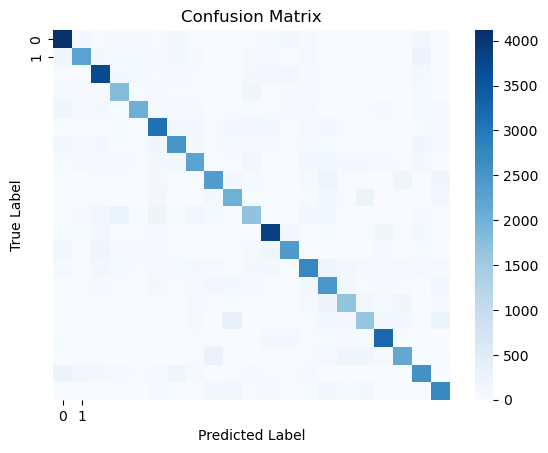

In [40]:
from sklearn import metrics
cm = metrics.confusion_matrix(test_labels, label_pred)
sns.heatmap(cm, annot=None, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()